<a href="https://colab.research.google.com/github/joycerlz/kpop-song-recommendation/blob/main/Kpop_song_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Engineering

In [ ]:
!pip install spotipy scikit-learn

In [17]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

import time
import pandas as pd
import numpy as np

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

In [4]:
CID = '7c56991d824840bd82d5d7833f48bd00'
CSECRET = 'c035b79d95f842a38a48bc267d018fa7'
REDIRECT_URI = 'https://example.com/callback/'

# Authenticate with the Spotify API
auth_manager = SpotifyClientCredentials(client_id=CID, client_secret=CSECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
# SCOPE='playlist-modify-public playlist-modify-private'
# auth_manager=SpotifyOAuth(client_id=CID, client_secret=CSECRET,
#                           redirect_uri=REDIRECT_URI, scope=SCOPE, open_browser=False)
# sp = spotipy.Spotify(auth_manager=auth_manager)

## Combine Playlists for the recommender

In [ ]:
playlist_id1 = ['3Ir5YWemOTGRRfXgROrsDV', '2EoheVFjqIxgJMb8VnDRtZ', '6i3sWRNcNStmrRQbkBuPEY',
                '4pS9TFzMWGko0c7j81Af1k', '0qsoSU5k8DURNv64YxWU2O', '5iOEBiMtsYFs1H1ob3x7Am',
                '7DmYmaINse2wok7HB4MxLI', '23PRull3xEck7YmXZLaXkR', '3RoWb8YSy3vFVOYNaNWtIp',
                '37i9dQZF1DX3ZeFHRhhi7Y', '0jB4ANR4ox65etDMnxvGLp', '6dVHKqnHJJcyF6mnKxN37n',
                '1iyUKbbYtUMf6nxalWSWzv', '4wH81Wyi8OrsDQROHkKyaQ', '2Mq9TtE1Hv3c20UvuX3UwB']

playlist_id2 = ['4GvkHkDoJGVy8kxRuCq1JB', '6tQDMnj0qImEl6AKA1Uv74', '37i9dQZF1DX9tPFwDMOaN1',
                '2Mq9TtE1Hv3c20UvuX3UwB', '3NCVx9Uval5IPMIIfgwTZS', '1tpDHJB0cCawtBnGrubklx',
                '3h7kbNysNjbXtD0keZeONs', '0Wc0s1uBF2clHtf0yL4ljG', '7ySPj2mU9sfTlmGifVTIkl',
                '7z3ruVFRvRxaLkGFXuN3np', '5RrSii6h1KoeshaZwVUBQj', '5fLM6HC3KuUUZoWMWEPy8N',
                '0k7ALIAtQEJRCo1q7xYM9U', '3D8dD4tzRqjdFJt1Ps9KTB', '7pCznI1pcVx371Bph5qZDL']

playlist_id3 = ['4po8EYyKV1j3DUWZBBtYab', '6kr18kuekReLi6b8qtfgsL', '5KY8GMBHePfNc6Hm9lAg0T',
                '6J6QKKw0dw5w55uVWOKybv', '0FehEuuo43J3AWohhOx2cd', '24DLVFYSq7WsagztzT86AW',
                '49ce1Tfrnw0DM8fsicFDmW', '4UdZOi6kZNG2nda1l93ejf', '1uqGBybhdwelUjuj8zHkEK',
                '691qcGOZQaJ3dUDw8zJnC2', '37i9dQZF1EIhBOZFCT3ubM', '1pak665KFkLa9L280LBEDU',
                '0wGXHwgbHyjV9n0Ld91KDU', '4qd0cBndErbt7VmMld4DkA', '0MZaqssqefz8GK4OUHb3fo']

# playlist_id4 = ['61HtPhUmp6qNVaAq8wcOQs', '2RoYgkPzUY0vY7lhUuyus1', '49rmL2iMrF5bDveD1B8fPt']

In [ ]:
def get_playlist_tracks(sp, playlist_id):
    tracks = []
    results = sp.playlist_tracks(playlist_id)
    tracks.extend(results['items'])
    while results['next']:
        # time.sleep(1)
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [ ]:
all_tracks = []

for id in playlist_id1:
  all_tracks.extend(get_playlist_tracks(sp, id))

Go to the following URL: https://accounts.spotify.com/authorize?client_id=7c56991d824840bd82d5d7833f48bd00&response_type=code&redirect_uri=https%3A%2F%2Fexample.com%2Fcallback%2F&scope=playlist-modify-public+playlist-modify-private
Enter the URL you were redirected to: https://example.com/callback/?code=AQBZwxSaUKAJp-hC45aHDd4IvwLU3lzWDgHEbWLABZIQhVYV9hajNLZBkf2muzcTStSY29n5t1ww_OT7-XRpLuNpcjYGbY18NUTiT38ozB-ixF4iLUhZ90JfdudVDeji0O5BMauaomUrCtP1lPmAdOH6J7fpk-4odPET_w0eQt7UtCFXIMX2Kbe_K7D2Nz12Gl0-1ADCjElCjXbaK77HBZzLGnYettxRK0He-4BNWtSwew


In [ ]:
for id in playlist_id2:
  all_tracks.extend(get_playlist_tracks(sp, id))

In [ ]:
for id in playlist_id3:
  all_tracks.extend(get_playlist_tracks(sp, id))

In [ ]:
# for id in playlist_id4:
#   all_tracks.extend(get_playlist_tracks(sp, id))

In [ ]:
total_songs = len(all_tracks)
print(f'length of songs: {total_songs}')

length of songs: 18280


In [ ]:
# print(all_tracks[0]['track']['id'])

all_track_ids = set()
for item in all_tracks:
    track = item.get('track')
    if track and track.get('id'):
        all_track_ids.add(track['id'])

print(len(all_track_ids))

8363


In [ ]:
# user_id = sp.current_user()['id']
# new_playlist = sp.user_playlist_create(user_id, 'Combined Kpop', public=True)
# new_playlist_id = new_playlist['id']

In [ ]:
def add_tracks_in_batches(sp, playlist_id, track_ids):
    batch_size = 100
    for i in range(0, len(track_ids), batch_size):
        sp.playlist_add_items(playlist_id, track_ids[i:i+batch_size])

unique_tracks = list(all_track_ids)

playlist_id = '1pIZJfk4XeaXhuRr1mEdAI'
add_tracks_in_batches(sp, playlist_id, unique_tracks)
print(f"New playlist created with ID: {playlist_id}")

New playlist created with ID: 1pIZJfk4XeaXhuRr1mEdAI


In [ ]:
def count_tracks_in_playlist(sp, playlist_id):
    playlist = sp.playlist(playlist_id)
    total_tracks = playlist['tracks']['total']
    return total_tracks

# Call the function to count the tracks in a playlist
total_tracks = count_tracks_in_playlist(sp, '1pIZJfk4XeaXhuRr1mEdAI')
print("Total tracks in playlist:", total_tracks)

Total tracks in playlist: 8363


In [ ]:
unique_track_ids = []

# Creating a function to get the first 50 tracks IDs from a playlist
def getTrackIDs(playlist_id):
    playlist = sp.user_playlist('spotify', playlist_id)
    for item in playlist['tracks']['items'][:50]:
        track = item['track']
        unique_track_ids.append(track['id'])
    return

## Fetch Playlist Data

In [ ]:
playlist_id = '1pIZJfk4XeaXhuRr1mEdAI'
username = 'uqn6etkh19yw7hqando01yfly'

# Fetch all tracks from the playlist using pagination
def fetch_all_tracks(username, playlist_id):
    ids = []
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    for item in tracks:
        track = item['track']
        if track:  # Check if the track object is not None
            ids.append(track['id'])

    return ids

In [ ]:
# Fetch all playlist tracks
all_tracks = fetch_all_tracks(username, playlist_id)
# tracks = results['items']
# if tracks:
    # track_ids = [track['track']['id'] for track in tracks if track.get('track')]
track_ids = fetch_all_tracks(username, playlist_id)
print(f"Number of tracks fetched: {len(track_ids)}")

Number of tracks fetched: 8335


In [5]:
import json

with open('track_ids.json', 'r') as file:
    track_ids = json.load(file)

print(track_ids[:5])

['7duDJSfX3dpiIqi0TDCzKF', '3JaMGQXJmtbAhvgl0nBPPN', '3atsk5EWI5fNxLMIJnfYfJ', '7IS4NciwYPs1wMywOKx69z', '5NbmRFtL4YLYv045u4bSNS']


In [16]:
# Creating a function get features of each track from track id
def getTrackFeatures(track_id):
  meta = sp.track(track_id)
  features = sp.audio_features(track_id)

  # meta
  track_id = track_id
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [track_id, name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [7]:
track_ids1 = track_ids[:1000]
track_ids2 = track_ids[1000:2000]
track_ids3 = track_ids[2000:3000]
track_ids4 = track_ids[3000:4000]
track_ids5 = track_ids[4000:5000]
track_ids6 = track_ids[5000:6000]
track_ids7 = track_ids[6000:7000]
track_ids8 = track_ids[7000:8000]
track_ids9 = track_ids[8000:]

In [8]:
print(len(track_ids8))

1000


In [9]:
track_info_list = []

# Iterate over each track ID and fetch its features
for track_id in track_ids8:
    track_info = getTrackFeatures(track_id)
    track_info_list.append(track_info)
    time.sleep(2)

In [10]:
print(len(track_info_list))

1000


In [26]:
print(track_info_list[879])

['4UEXKi06Ykkx52mme7VvoH', 'BOOM', 'Fe3O4: BREAK', 'NMIXX', '2024-01-15', 175733, 52, 0.836, 0.0155, 0.697, 0, 0.0805, -4.575, 0.0588, 110.09, 4]


In [27]:
headers = [
    'track_id', 'track_name', 'album', 'artist', 'release_date', 'length',
    'popularity', 'danceability', 'acousticness', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'time_signature']

In [28]:
track_df8 = pd.DataFrame(track_info_list, columns=headers)
track_df8.head(10)

,track_id,track_name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,3Jnwl9zlbFNEqKQjydxLxe,BONVOYAGE,[Apocalypse : From us],Dreamcatcher,2023-05-24,213506,48,0.487,0.00417,0.858,0.000000,0.1490,-3.915,0.0603,157.962,4
1,4u04u2pxwZtPKCbURB24GT,Fake & True,&TWICE,TWICE,2019-09-23,219625,39,0.678,0.05690,0.808,0.000000,0.2880,-3.973,0.0599,125.938,4
2,7LJjWqhqK594nN7qJzLVXE,As If It's Your Last,As If It's Your Last,BLACKPINK,2017-06-22,213264,0,0.786,0.06880,0.853,0.000000,0.0759,-2.687,0.0816,125.034,4
3,2EmcTFQ1rM11wp2ztsXTHa,Black Swan,MAP OF THE SOUL : 7,BTS,2020-02-21,198260,64,0.719,0.13700,0.757,0.000000,0.1290,-5.167,0.0849,147.024,4
4,4fbt4KMm5YvLTkpLJDvOFu,Replay,NITM,I'MIN,2021-04-05,185132,43,0.411,0.64900,0.543,0.000000,0.1490,-6.298,0.0898,199.707,3
5,754PhkDUWZUkHbM7zfiLKm,Whatta Man (Good man),Whatta Man (Good Man),I.O.I,2016-08-09,193604,0,0.559,0.00630,0.936,0.000039,0.4570,-2.254,0.0931,150.065,4
6,32ZAKn8Qc0VGn4UmCxnR5z,RISE UP,QUEENDOM PUZZLE RISE UP,QUEENDOM PUZZLE,2023-06-08,198693,19,0.647,0.20800,0.853,0.000000,0.0878,-2.570,0.0372,99.958,4
7,3Jbpo2slhW2bbVneiJnC9G,LMLY,LMLY,Jackson Wang,2021-03-26,209998,12,0.727,0.05230,0.736,0.000000,0.1190,-6.566,0.0319,139.929,4
8,1Q6lzzQHM5dvtTCwcfeKDy,PARANOIA,PARANOIA,KANGDANIEL,2021-02-16,195333,46,0.633,0.05130,0.735,0.000000,0.2590,-3.042,0.0363,97.030,4
9,3E29VjkpQlzslDyCqYewDm,3.6.5,The 1st Album 'XOXO' (Repackage),EXO,2013-08-05,185091,39,0.740,0.06780,0.830,0.000000,0.0534,-3.051,0.0434,131.042,4


In [29]:
track_df8.shape

(1000, 16)

In [30]:
track_df8.to_csv('track_info8.csv', index=False)

In [31]:
df1 = pd.read_csv('track_info7000.csv')
df2 = pd.read_csv('track_info8.csv')

combined = pd.concat([df1, df2], ignore_index=True)
print(combined.shape)
combined.head()

(8000, 16)


,track_id,track_name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,7duDJSfX3dpiIqi0TDCzKF,home sweet home,Type2 diabetes,pylat,2022-04-21,216746,1,0.701,0.4590,0.698,0.000000,0.0433,-6.666,0.0282,109.956,4
1,3JaMGQXJmtbAhvgl0nBPPN,Mr.Mr.,Mr. Mr. - The 4th Mini Album,Girls' Generation,2014-02-24,235434,55,0.701,0.1140,0.964,0.000009,0.1530,-2.037,0.1270,113.058,4
2,3atsk5EWI5fNxLMIJnfYfJ,The Red Shoes,Modern Times,IU,2013-10-08,254249,45,0.636,0.5120,0.922,0.000000,0.0898,-2.131,0.2110,118.065,4
3,7IS4NciwYPs1wMywOKx69z,SEE U LATER - Japanese Version,BLACKPINK IN YOUR AREA (Japanese Version),BLACKPINK,2018-12-05,199933,50,0.774,0.0322,0.907,0.000000,0.5080,-3.799,0.1140,107.005,4
4,5NbmRFtL4YLYv045u4bSNS,Any,IN LIFE,Stray Kids,2020-09-14,169140,0,0.879,0.0309,0.868,0.000000,0.1070,-3.113,0.0632,110.054,4


In [32]:
combined.to_csv('track_info8000.csv', index=False)

## Exploratory Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('track_info8000.csv')
df.sample(5)
# Ensuring there are no missing values in the Data frame
# missing_values = df.isnull().sum()
# print(missing_values)

,track_id,track_name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
5312,5fw5CY7DwCTw4Jef87yUNv,Burning Up (feat. R3HAB),SHAPE OF LOVE,MONSTA X,2022-04-26,200426,0,0.808,0.10800,0.767,0.000000,0.2970,-3.913,0.0605,120.024,4
556,7ooqeo8bdiIZoLSG3KEU1e,Happy Me,"Reply 1994 (Original Television Soundtrack), P...",LIM KIM,2013-11-29,258680,33,0.498,0.73800,0.727,0.000002,0.1230,-5.690,0.0318,135.892,4
5466,0wqqe8k13bJPxRt7FEmnwS,So What,Love Yourself 轉 'Tear',BTS,2018-05-18,281520,60,0.657,0.02380,0.883,0.000000,0.0481,-4.294,0.0733,129.943,4
6784,6coYgp4v0p7ydzqfccmiTn,Chicken,YOOK O'clock,YOOK SUNGJAE,2020-03-02,179880,24,0.762,0.10200,0.881,0.000000,0.3170,-3.384,0.0549,95.004,4
3438,3MJtE5VkJHHTV74E6KIDIv,Vanilla,Vanilla,LIGHTSUM,2021-06-10,204426,38,0.727,0.00526,0.839,0.000111,0.0493,-2.555,0.2090,119.983,4


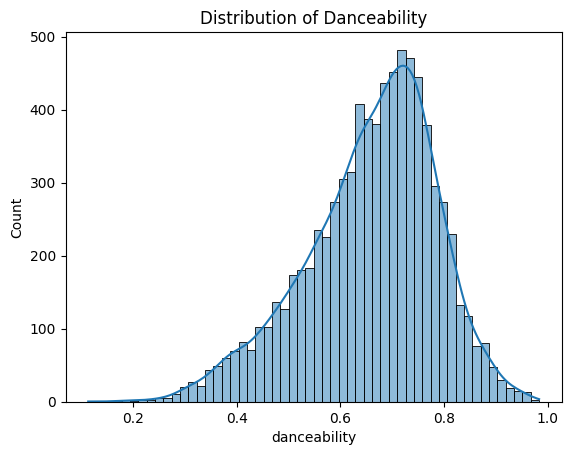

In [10]:
# Plotting feature distributions
# for ['length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness',
#      'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']
sns.histplot(df['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.show()

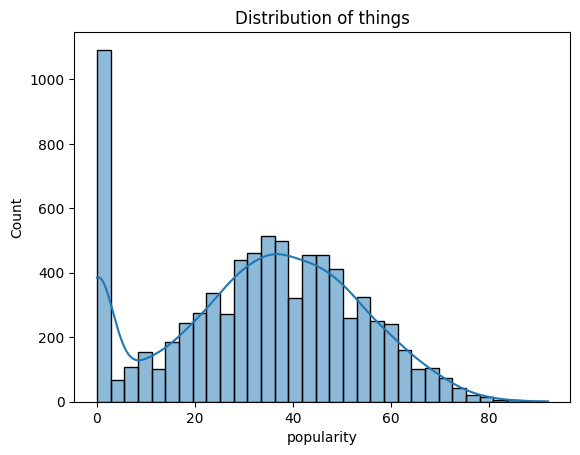

In [11]:
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of things')
plt.show()

In [ ]:
# for outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x='length', data=df)
plt.title('Boxplot of Popularity')
plt.show()

In [ ]:
# Scatter plot for danceability vs. energy (correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df)
plt.title('Danceability vs. Energy')
plt.show()

In [ ]:
# Select a subset of features for the pairplot
selected_features = ['danceability', 'energy', 'loudness', 'popularity']

# Plot the pairplot
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [36]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
print(numeric_df.dtypes)

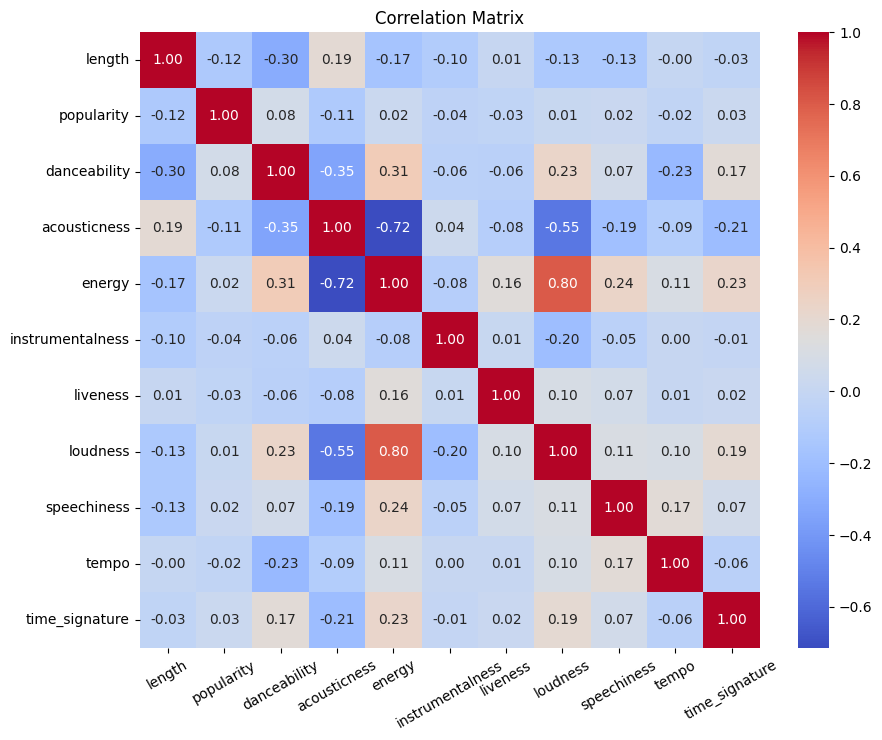

In [47]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=30)
plt.show()

## Data Engineering

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
min_popularity = df['popularity'].min()
max_popularity = df['popularity'].max()

min_loudness = df['loudness'].min()
max_loudness = df['loudness'].max()

min_tempo = df['tempo'].min()
max_tempo = df['tempo'].max()

print(f"Popularity - Min: {min_popularity}, Max: {max_popularity}")
print(f"Loudness - Min: {min_loudness}, Max: {max_loudness}")
print(f"Tempo - Min: {min_tempo}, Max: {max_tempo}")

Popularity - Min: 0, Max: 92
Loudness - Min: -20.25, Max: 0.279
Tempo - Min: 48.973, Max: 229.829


In [ ]:
max_popularity_index = df['popularity'].idxmax()
row_with_max_popularity = df.loc[max_popularity_index]

print(row_with_max_popularity)

## Getting recommendations

In [20]:
# ask user to type in a song or a playlist's url and calculate the cosine similarity
input_url = 'https://open.spotify.com/playlist/4kgpqG8RXfb7Fy3yqz5zdd?si=f2363eb8b4804628'
# input_url = 'https://open.spotify.com/track/4XrWar13kLO1jr535AzKrQ?si=a4f434f9417d49de'

In [21]:
def get_features_from_url(url):
    track_features = []
    if "track" in url:
        track_id = url.split('/')[-1].split('?')[0]
        features = getTrackFeatures(track_id)
        track_features.append(features)
    elif "playlist" in url:
        playlist_id = url.split('/')[-1].split('?')[0]
        tracks = sp.playlist_tracks(playlist_id)["items"]
        np.random.shuffle(tracks)
        for item in tracks[:100]:
            track_id = item["track"]["id"]
            features = getTrackFeatures(track_id)
            track_features.append(features)
    return track_features

In [ ]:
headers = [
    'track_id', 'track_name', 'album', 'artist', 'release_date', 'length',
    'popularity', 'danceability', 'acousticness', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'time_signature']

user_features = get_features_from_url(input_url)
user_features_df = pd.DataFrame(user_features, columns=headers)

In [25]:
user_features_df.shape
user_features_df.sample(5)

,track_id,track_name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
8,2ln1zeqUzDmxKzfQdvmPKu,Moderato,MEMORY,MAMAMOO,2016-11-07,238956,24,0.542,0.1820,0.854,0.0,0.1500,-2.850,0.1640,162.266,4
83,2qfEcCkEo5NscA9GL7ER72,Nobody,Nobody,Martin Jensen,2019-03-01,211040,51,0.673,0.2690,0.687,0.0,0.1810,-5.295,0.0623,96.964,4
17,0xEW9gPv5wNuS84pXGG3lc,Running On My Mind,Running On My Mind,Ali Gatie,2020-05-28,156721,46,0.619,0.4640,0.453,0.0,0.1490,-7.697,0.0264,96.021,4
79,3afkJSKX0EAMsJXTZnDXXJ,Strawberries & Cigarettes,Strawberries & Cigarettes,Troye Sivan,2018-03-16,201538,70,0.578,0.1620,0.537,0.0,0.0760,-8.676,0.0832,83.909,4
33,0DC7Zs2qvAbNK1owWQ4mlL,Perfect to Me,Perfect to Me,Anne-Marie,2018-11-02,197853,48,0.604,0.0889,0.546,0.0,0.0734,-5.691,0.1510,179.847,4


In [ ]:
# Normalizing Feature Vectors
features_to_normalize = ['popularity', 'loudness', 'tempo']

min_row = {'popularity': 0, 'loudness': -60, 'tempo': 0}
max_row = {'popularity': 100, 'loudness': 0, 'tempo': 250}

min_row_df = pd.DataFrame([min_row])
max_row_df = pd.DataFrame([max_row])

df_with_extremes = pd.concat([df, min_row_df, max_row_df], ignore_index=True)

scaler = MinMaxScaler()
df_with_extremes[features_to_normalize] = scaler.fit_transform(df_with_extremes[features_to_normalize])

# Remove the min and max rows after scaling
df = df_with_extremes.iloc[:-2]
df.head()

In [26]:
# normalize user features
user_features_df[features_to_normalize] = scaler.transform(user_features_df[features_to_normalize])


In [27]:
user_features_df.sample(5)

,track_id,track_name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
37,3QEsfxlJirmv7REVlcuZD4,What's On Your Mind,My Friend's Romance (Original Television Sound...,LEE CHANGSUB,2017-08-22,183534,0.00,0.725,0.0457,0.828,0.000000,0.0654,0.938702,0.0310,0.416104,4
96,4xigPf2sigSPmuFH3qCelB,"Genius (feat. Sia, Diplo, and Labrinth)","LABRINTH, SIA & DIPLO PRESENT... LSD",Sia,2019-04-12,213706,0.71,0.603,0.0799,0.615,0.000067,0.1170,0.913569,0.1650,0.634628,4
49,5FkoSXiJPKTNyYgALRJFhD,ORANGE SODA,DIE FOR MY BITCH,Baby Keem,2019-07-19,129882,0.74,0.830,0.1770,0.564,0.000000,0.1280,0.865608,0.2350,0.340168,4
79,3afkJSKX0EAMsJXTZnDXXJ,Strawberries & Cigarettes,Strawberries & Cigarettes,Troye Sivan,2018-03-16,201538,0.70,0.578,0.1620,0.537,0.000000,0.0760,0.851441,0.0832,0.335636,4
65,5gA9Xn8oPts2aewPgxVkPD,Heroine,Heroine,SUNMI,2018-01-18,195000,0.47,0.673,0.0582,0.782,0.000001,0.3910,0.930490,0.0404,0.487964,4


In [ ]:
# Function to format release dates
# def format_release_date(date):
#     # If the date is in the format 'YYYY' or 'YYYY-MM', convert it to 'YYYY-00-00'
#     if len(date) == 4:
#         return f"{date}-01-01"
#     elif len(date) == 7:
#         return f"{date}-01"
#     else:
#         return date

# df['release_date'] = df['release_date'].apply(format_release_date)
# df['release_date'] = pd.to_datetime(df['release_date'])

# # Extracting year and month
# df['release_year'] = df['release_date'].dt.year
# df['release_month'] = df['release_date'].dt.month
# df.sample(5)

In [28]:
def get_recommendations(user_features_df, df, features_to_normalize, top_n=10):
    normalized_features = df[features_to_normalize + ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness']].values
    user_normalized = user_features_df[features_to_normalize + ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness']].values

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(user_normalized, normalized_features)
    mean_similarity = similarity_scores.mean(axis=0)
    top_indices = mean_similarity.argsort()[-top_n:][::-1]

    return df.iloc[top_indices]

# Example usage: Get recommendations based on user input
recommendations = get_recommendations(user_features_df, df, features_to_normalize)
recommendations[['track_name', 'artist', 'album']]


,track_name,artist,album
2454,Love Letter,LOONA,JinSoul
7280,Baby PLZ (feat. Jay Park),Moon Sujin,BLESSED
1293,Universe,MAMAMOO,reality in BLACK
7802,﻿I Wanna Do,STAYC,TEENFRESH
5023,DON'T TEXT ME,(G)I-DLE,I am
7827,BYOB (bring your own best friend) (English Ver.),Billlie,Billlie 'BYOB (bring your own best friend)'
3465,Wonderland,Dreamcatcher,Alone In The City
3475,TWENTY TWENTY (MiU Solo) - Korean Version,LIMELIGHT,LAST DANCE
169,Really High,Seori,?depacse ohw
2659,Fireplace,JONGHYUN,"JONGHYUN The Collection ""Story Op.2"""


## Experimenting

In [18]:
# Get track audio features
# my_list = list(all_track_ids)
# track_id = '3r8RuvgbX9s7ammBn07D3W'
track_id = '4XrWar13kLO1jr535AzKrQ'
track_info = sp.track(track_id)
audio_features = sp.audio_features(track_id)

In [19]:
song_title = track_info['name']
art = track_info['artists'][0]['name']
print(f"Song Title: {song_title}")
print(f"Artist: {art}")
print(track_info)

Song Title: 我不難過
Artist: Stefanie Sun
{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0SIXZXJCAhNU8sxK0qm7hn'}, 'href': 'https://api.spotify.com/v1/artists/0SIXZXJCAhNU8sxK0qm7hn', 'id': '0SIXZXJCAhNU8sxK0qm7hn', 'name': 'Stefanie Sun', 'type': 'artist', 'uri': 'spotify:artist:0SIXZXJCAhNU8sxK0qm7hn'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 

In [ ]:
if audio_features:
    features = audio_features[0]
    print(f"Danceability: {features['danceability']}")
    print(f"Energy: {features['energy']}")
    print(f"Loudness: {features['loudness']}")
    print(f"Tempo: {features['tempo']}")
    print(f"Valence: {features['valence']}")
    print(features)

Danceability: 0.367
Energy: 0.668
Loudness: -4.484
Tempo: 104.961
Valence: 0.384
{'danceability': 0.367, 'energy': 0.668, 'key': 2, 'loudness': -4.484, 'mode': 0, 'speechiness': 0.052, 'acousticness': 0.336, 'instrumentalness': 0, 'liveness': 0.147, 'valence': 0.384, 'tempo': 104.961, 'type': 'audio_features', 'id': '6S2gYweMmT6xygVh5q3QLa', 'uri': 'spotify:track:6S2gYweMmT6xygVh5q3QLa', 'track_href': 'https://api.spotify.com/v1/tracks/6S2gYweMmT6xygVh5q3QLa', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6S2gYweMmT6xygVh5q3QLa', 'duration_ms': 226212, 'time_signature': 4}


In [ ]:
# Search for a track by name
track_name = "O.O"
results = sp.search(q=track_name, limit=1, type='track')

# Extract the track ID
if results['tracks']['items']:
    track_id = results['tracks']['items'][0]['id']
    print(f"Track ID: {track_id}")
else:
    print("Track not found")

Track ID: 44zfpg3ndtGESsgpTbWeyE
